# Figures 6, 7, and 8: Violin Plots

## 1. Notebook Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.options.mode.chained_assignment = None

## 2. Import Data

In [2]:
# Load data, i.e. outputs from PEPPER
all_planets = pd.read_csv('../data/planets.csv')
extra_tests = pd.read_csv('../data/planetsranextratimes.csv')

# Mask the dataframe to select planet pairs with mass measurements for the enveloped planet
mass_mask = all_planets['env mass flag'] == 0
planets = all_planets[mass_mask]

extra_mask = extra_tests['env mass flag'] == 0
extra_planets = extra_tests[extra_mask]

# Reindex using the system names
planets.index = planets['planet name']
extra_planets.index = extra_planets['planet name']

## 3. Organize Data

In [3]:
# Assemble a list of all defined planet names
planetnames = [x for x in list(planets['planet name']) if str(x) != 'nan']
extranames = [x for x in list(extra_planets['planet name']) if str(x) != 'nan']

# Initialize total probability to be less than 0
planets['PEprobtot'] = planets['CPMLprobtot'] = planets['PRVprobtot'] = -1.0
extra_planets['PEprobtot200'] = extra_planets['PEprobtot1000']=extra_planets['CPMLprobtot900']=extra_planets['CPMLprobtot1100']=extra_planets['PRVprobtot10'] = -1.0

# For each planet, save its minimum probability of consistency with each mechanism
for name in planetnames:
    first_name = np.where(planets['planet name']==name)[0][0]
    planets.iloc[first_name,-3] = planets.loc[name,'PEprob'].min()
    planets.iloc[first_name,-2] = planets.loc[name,'CPMLprob'].min()
    planets.iloc[first_name,-1] = planets.loc[name,'PRVprob'].min()
    
for name in extranames:
    first_name = np.where(extra_planets['planet name']==name)[0][0]
    extra_planets.iloc[first_name,-5] = extra_planets.loc[name,'PE200prob'].min()
    extra_planets.iloc[first_name,-4] = extra_planets.loc[name,'PE1000prob'].min()
    extra_planets.iloc[first_name,-3] = extra_planets.loc[name,'CPML900prob'].min()
    extra_planets.iloc[first_name,-2] = extra_planets.loc[name,'CPML1100prob'].min()
    extra_planets.iloc[first_name,-1] = extra_planets.loc[name,'PRV10prob'].min()

# Replace nonsensical probabilities with the minimum probability of consistency
planets = planets[planets['PEprobtot'] >= 0]
extra_planets = extra_planets[extra_planets['PEprobtot200'] >= 0]

## 4. Helper Functions

In [4]:
# A function to bin the data using stellar mass
makebins = lambda num,bounds,column: [(planets[column] <= bounds[i+1]) & (planets[column] > bounds[i]) for i in range(num)]
extra_makebins = lambda num,bounds,column: [(extra_planets[column] <= bounds[i+1]) & (extra_planets[column] > bounds[i]) for i in range(num)]

# A function to package probabilities for plotting
makeboxes = lambda num,probPE,probCPML,probPRV: [(probPE[i], probCPML[i], probPRV[i]) for i in range(num)]
extra_makeboxes = lambda num,probPE200,probPE1000,probCPML900, probCPML1100, probPRV10: [(probPE200[i], probPE1000[i], probCPML900[i], probCPML1100[i], probPRV10[i]) for i in range(num)]

In [5]:
# Fill probability lists
def prob_lists(bins):
    probPE = [planets['PEprobtot'][bins[b]] for b in range(num)]
    probCPML = [planets['CPMLprobtot'][bins[b]] for b in range(num)]
    probPRV = [planets['PRVprobtot'][bins[b]] for b in range(num)]
    return probPE,probCPML,probPRV

def extra_prob_lists(bins):
    probPE200 = [extra_planets['PEprobtot200'][bins[b]] for b in range(num)]
    probPE1000 = [extra_planets['PEprobtot1000'][bins[b]] for b in range(num)]
    probCPML900 = [extra_planets['CPMLprobtot900'][bins[b]] for b in range(num)]
    probCPML1100 = [extra_planets['CPMLprobtot1100'][bins[b]] for b in range(num)]
    probPRV10 = [extra_planets['PRVprobtot10'][bins[b]] for b in range(num)]
    return probPE200, probPE1000, probCPML900, probCPML1100, probPRV10

## 5. Plot Figure 6

In [20]:
# Set the number of bins and the bounds
num,bounds = 1,(0, 1.3)
extra_num,extra_bounds = 1,(0, 1.3)

# Make the bins
bins = makebins(num, bounds, 'star mass')
extra_bins = extra_makebins(extra_num, extra_bounds, 'star mass')

# Calculate the probability distributions
probPE,probCPML,probPRV = prob_lists(bins)
probPE200, probPE1000, probCPML900, probCPML1100, probPRV10= extra_prob_lists(extra_bins)

# Set the plot colors
colors = ['royalblue', 'brown', 'lightsalmon']
#Set the colors for the translucent violins
extra_colors = ['lightskyblue','cornflowerblue', 'pink','indianred',  'peachpuff']

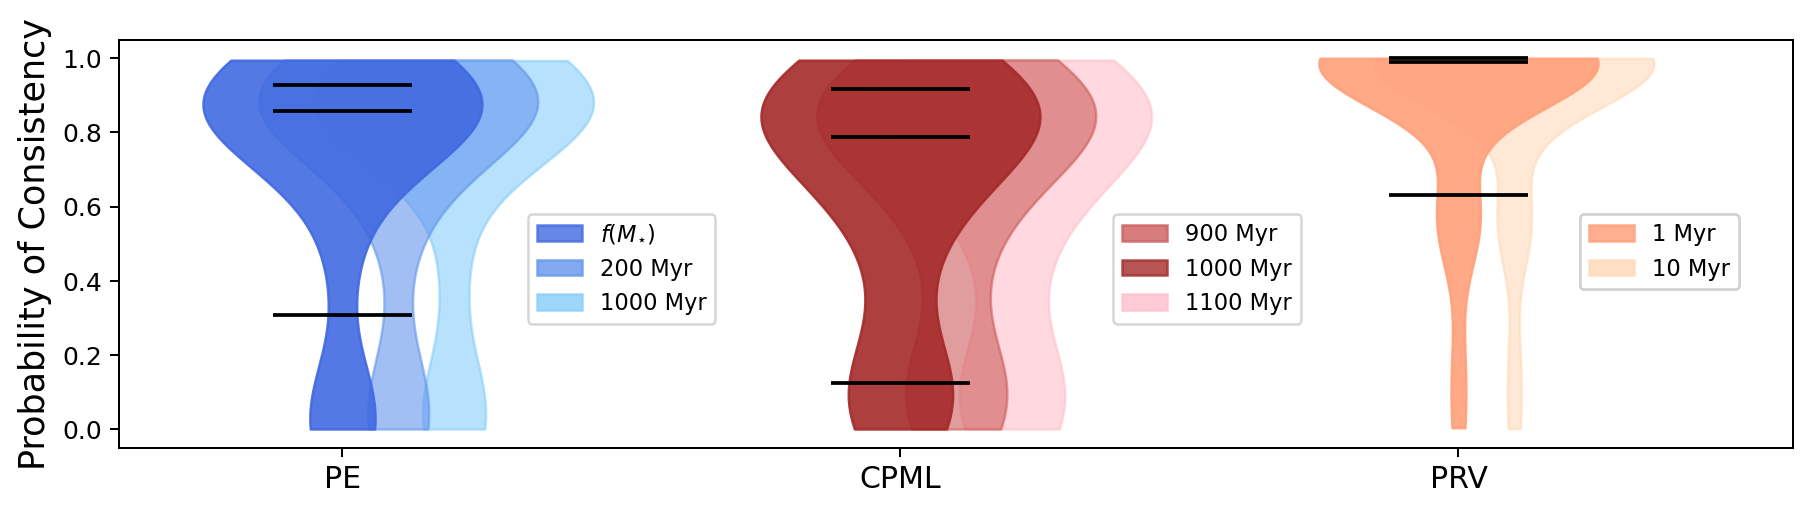

In [21]:
# Create the figure and axes
fig, ax=plt.subplots(1,num, dpi=180., facecolor='white', sharey=True, figsize=(12,3))
fig.subplots_adjust(wspace=0)

# Create labels and vplots lists
labels,vplots = ['100 Myr', '1000 Myr', '1 Myr'],[]
extra_labels,extra_vplots = ['1000 Myr', '200 Myr', '900 Myr', '1100 Myr', '10 Myr'],[]

# Create the boxes to be plotted
box = makeboxes(num, probPE, probCPML, probPRV)
extra_box = extra_makeboxes(extra_num, probPE200, probPE1000, probCPML900, probCPML1100, probPRV10)

# Plot each of the violin plots    
for i in range(extra_num): 
    extra_vplots.append(ax.violinplot(extra_box[i], positions=[1.2,1.1, 2.2,2.1,3.1],showmedians=False, showextrema=False))
for i in range(num): 
    vplots.append(ax.violinplot(box[i], positions=[1,2,3], showmedians=True, showextrema=False, quantiles=[[.16,.84], [.16,.84], [.16,.84]]))
    
# Plot correct colors for patches and edges
for box in vplots:
    for patch, color in zip(box['bodies'], colors): 
        patch.set_color(color)
        patch.set_alpha(0.9)
    box['cmedians'].set_edgecolor('k')
    box['cquantiles'].set_edgecolor('k')
          
for extra_box in extra_vplots:
    for patch, color in zip(extra_box['bodies'], extra_colors): 
        patch.set_color(color)
        patch.set_alpha(0.6)
    
# Modify axis labels
ax.set_xticks([1,2,3])
ax.set_xticklabels(['PE','CPML', 'PRV'], fontsize=12)
ax.set_ylabel('Probability of Consistency', fontsize=14)

#crete legends 
PEcolors=['royalblue','cornflowerblue','lightskyblue']
CPMLcolors=['indianred','brown', 'pink']
PRVcolors=['lightsalmon','peachpuff']
handlesPE = [plt.Rectangle((0,0),1,1,color=color, alpha=0.8) for color in PEcolors]
handlesCPML = [plt.Rectangle((0,0),1,1,color=color, alpha=0.8) for color in CPMLcolors]
handlesPRV = [plt.Rectangle((0,0),1,1,color=color, alpha=0.8) for color in PRVcolors]

legend1=plt.legend(handlesPE, ['$f(M_{\star})$', '200 Myr', '1000 Myr'], loc='upper center', fontsize=9, bbox_to_anchor=(0.3, 0.6))
legend2=plt.legend(handlesCPML, ['900 Myr','1000 Myr', '1100 Myr'], loc='upper center', fontsize=9, bbox_to_anchor=(0.65, 0.6))
legend3=plt.legend(handlesPRV, ['1 Myr','10 Myr'], loc='upper center', fontsize=9, bbox_to_anchor=(0.92, .6))

# Add all legends to the plot
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)
plt.gca().add_artist(legend3)

plt.xlim(0.6, 3.6)

# Save Figure 6
#plt.savefig('test_violin_full.png', dpi=180., bbox_inches='tight')

## 6. Plot Figure 7

In [10]:
# Set the number of bins and the bounds
num,bounds = 4,(0.138, 0.6, 0.8, 1.0, 1.3)
# Make the bins
bins = makebins(num, bounds, 'star mass')
# Calculate the probability distributions
probPE,probCPML,probPRV = prob_lists(bins)

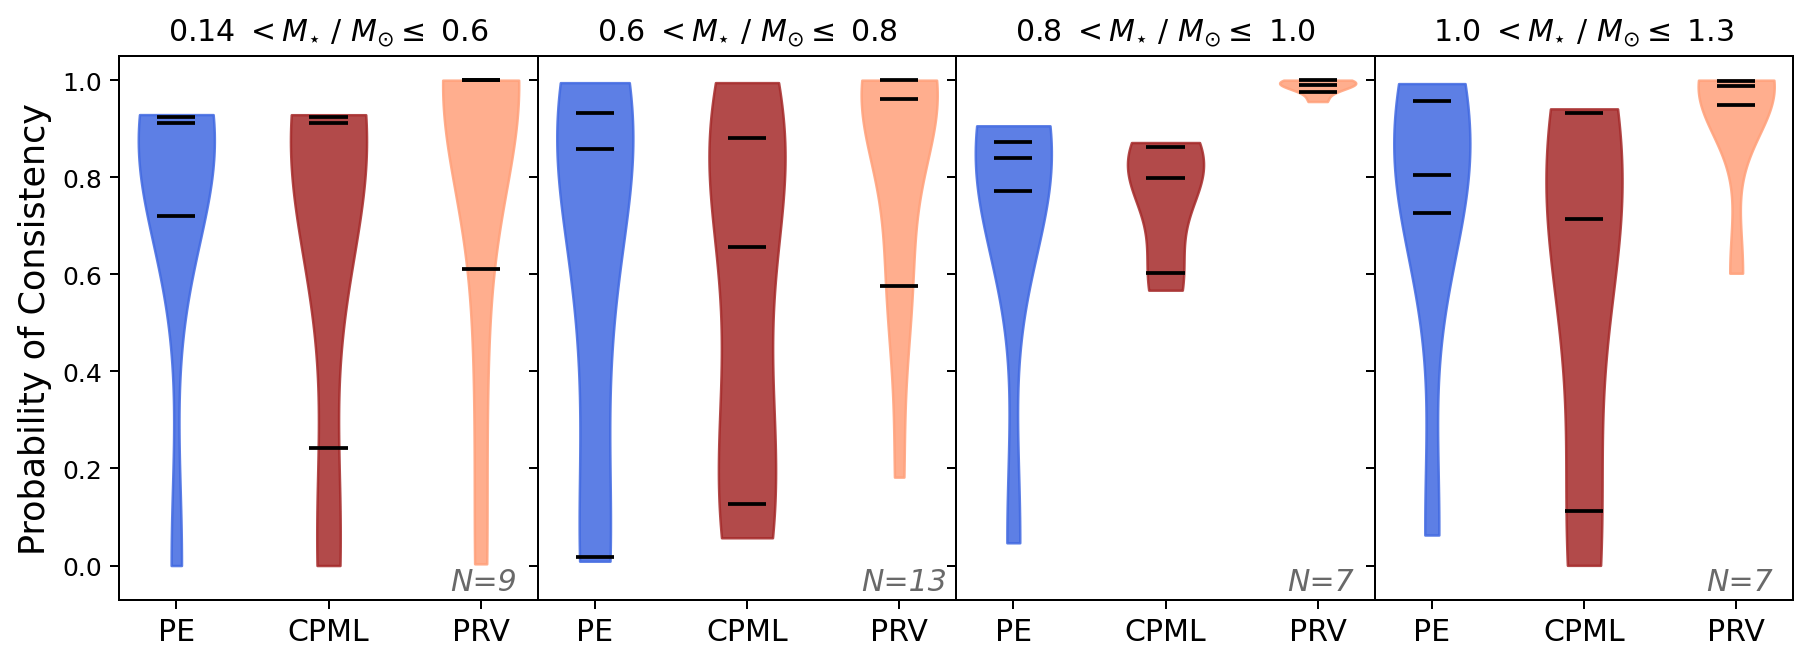

In [11]:
# Create the figure and axes
fig, ax=plt.subplots(1,num, dpi=180., facecolor='white', sharey=True, figsize=(12,4))
fig.subplots_adjust(wspace=0)

# Create the boxes to be plotted
box = makeboxes(num, probPE, probCPML, probPRV)
# Create labels, vplots, titles, and text lists
labels,vplots,titles,text = ['PE', 'CPML', 'PRV'],[], [r'0.14 $ < M_{\star}$ / $M_{\odot} \leq $ 0.6', \
                            r'0.6 $ < M_{\star}$ / $M_{\odot} \leq $ 0.8', r'0.8 $ < M_{\star}$ / $M_{\odot} \leq $ 1.0', \
                            r'1.0 $ < M_{\star}$ / $M_{\odot} \leq $ 1.3'], \
                            [{'x':2.8,'text':'N=9'},{'x':2.75,'text':'N=13'},{'x':2.8,'text':'N=7'},{'x':2.8,'text':'N=7'}]

# Plot each of the violin plots and set axis labels for each
for i in range(num): 
    vplots.append(ax[i].violinplot(box[i], showmedians=True, showextrema=False, quantiles=[[.16,.84], [.16,.84], [.16,.84]]))
    ax[i].set_xticks([1,2,3])
    ax[i].set_xticklabels(labels, fontsize=12)
    ax[i].set_title(titles[i])
    ax[i].set_ylim(-0.07, 1.05)
    ax[i].text(text[i]['x'], -0.05, text[i]['text'], fontsize=12, fontstyle='italic', color='dimgray')
    if i == 0: ax[i].set_ylabel('Probability of Consistency', fontsize=14)

# Plot correct colors for patches and edges
for box in vplots:
    for patch, color in zip(box['bodies'], colors): 
        patch.set_color(color)
        patch.set_alpha(0.85)
    box['cmedians'].set_edgecolor('k')
    box['cquantiles'].set_edgecolor('k')

# Save Figure 7
#plt.savefig('violin_stellarmass.png', dpi=180., bbox_inches='tight')

## 7. Plot Figure 8

In [12]:
# Set the number of bins and the bounds
num,bounds = 3,(-0.5,-0.1,0.1,0.5)
# Make the bins
bins = makebins(num, bounds, 'star met')
# Calculate the probability distributions
probPE,probCPML,probPRV = prob_lists(bins)

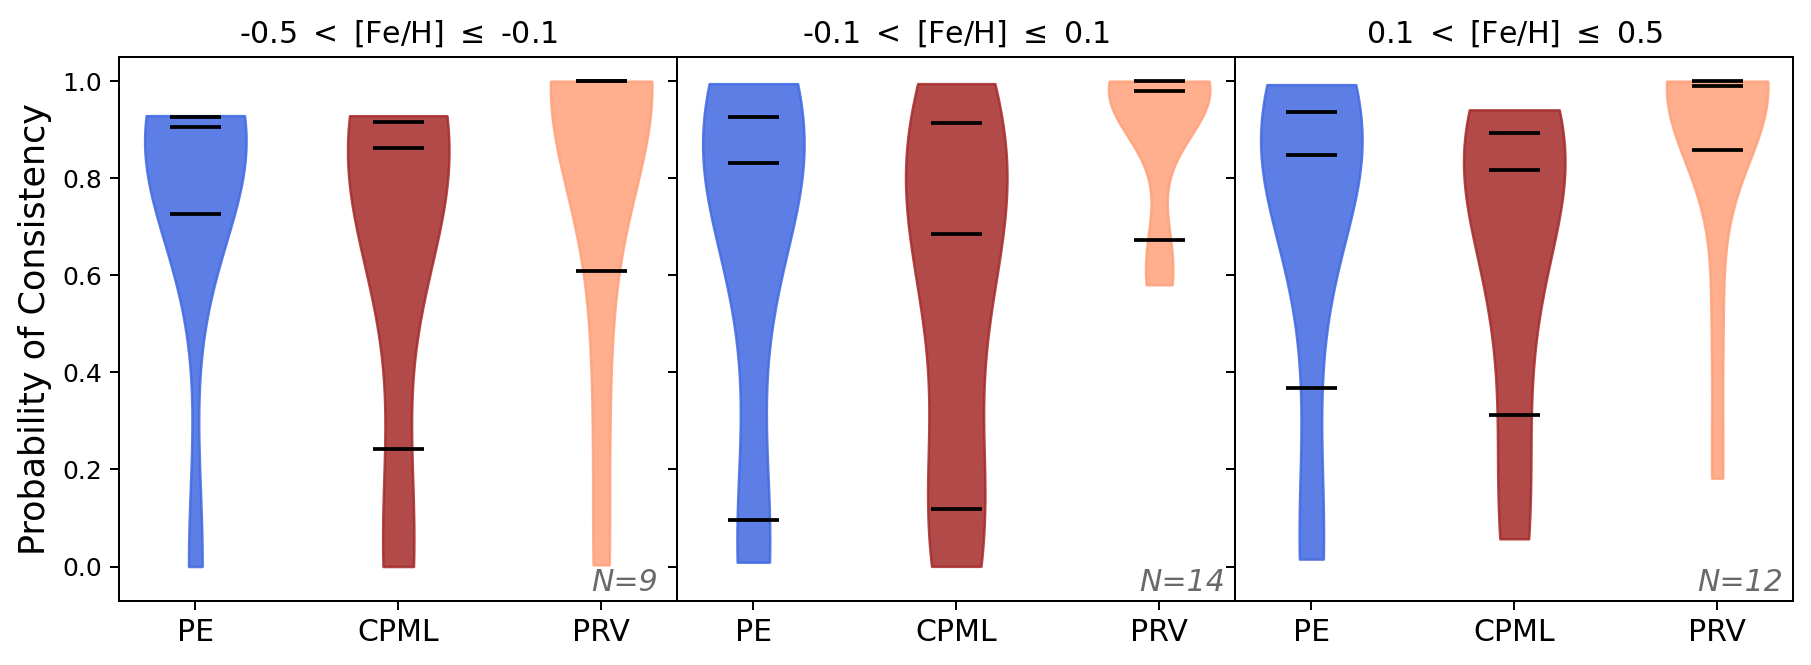

In [13]:
# Create the figure and axes
fig, ax=plt.subplots(1,num, dpi=180., facecolor='white', sharey=True, figsize=(12,4))
fig.subplots_adjust(wspace=0)

# Create the boxes to be plotted
box = makeboxes(num, probPE, probCPML, probPRV)
# Create labels, vplots, titles, and text lists
labels,vplots,titles,text = ['PE', 'CPML', 'PRV'],[], [r'-0.5 $<$ [Fe/H] $\leq$ -0.1', \
                            r'-0.1 $<$ [Fe/H] $\leq$ 0.1', r'0.1 $<$ [Fe/H] $\leq$ 0.5'], \
                            [{'x':2.95,'text':'N=9'},{'x':2.9,'text':'N=14'},{'x':2.9,'text':'N=12'}]

# Plot each of the violin plots and set axis labels for each
for i in range(num): 
    vplots.append(ax[i].violinplot(box[i], showmedians=True, showextrema=False, quantiles=[[.16,.84], [.16,.84], [.16,.84]]))
    ax[i].set_xticks([1,2,3])
    ax[i].set_xticklabels(labels, fontsize=12)
    ax[i].set_title(titles[i])
    ax[i].set_ylim(-0.07, 1.05)
    ax[i].text(text[i]['x'], -0.05, text[i]['text'], fontsize=12, fontstyle='italic', color='dimgray')
    if i == 0: ax[i].set_ylabel('Probability of Consistency', fontsize=14)

# Plot correct colors for patches and edges
for box in vplots:
    for patch, color in zip(box['bodies'], colors): 
        patch.set_color(color)
        patch.set_alpha(0.85)
    box['cmedians'].set_edgecolor('k')
    box['cquantiles'].set_edgecolor('k')

# Save Figure 8
#plt.savefig('violin_met.png', dpi=180., bbox_inches='tight')